In [1]:
import os
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [2]:
pd.options.display.max_columns = 500

In [3]:
geir_path = "/geir_data/scr/petershi" #should save work here 
sdssv_path = "/yngve_data/sdssv/ipl-2/spectro/astra/0.3.0/v6_0_9-1.0/spectra/star" #path for SDSSV spectra
sdssiv_path = "/yngve_data/sdss/apogee/dr17/apogee/spectro/redux/dr17/stars/apo25m"

In [4]:
points = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V (ALL) points - retrain.csv"))
errs = pd.read_csv(os.path.join(geir_path, "serialized", "SDSS-V (ALL) errors - retrain.csv"))

In [5]:
points

,teff,logg,C,CI,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,TiII,V,Cr,Mn,Fe,Co,Ni,ID
0,4764.8677,3.367551,-1.218930,-1.235952,-1.356836,-1.102028,-1.166686,-1.332733,-1.575550,-1.103627,-1.352423,-0.976301,-1.079750,-1.305616,-1.460817,-1.028681,-1.281695,-1.647069,-1.647646,-1.322813,-1.189421,-1.268859,18014398509500000
1,4552.9355,2.939479,-0.664613,-0.778846,-0.668716,-0.659505,-0.768945,-0.924251,-1.053405,-0.758479,-0.884668,-0.518620,-0.690300,-0.702539,-0.907848,-0.776158,-0.840451,-0.840649,-0.896378,-0.830341,-0.603020,-0.739057,18014398509600000
2,4764.3965,2.571474,-0.303738,-0.313190,-0.064251,-0.116744,-0.237923,-0.126434,-0.111297,-0.139869,-0.251428,-0.122943,-0.103279,-0.184283,-0.193996,-0.152923,-0.349987,-0.233588,-0.232759,-0.211447,-0.163911,-0.191659,18014398509700000
3,4278.5537,1.734360,-0.124294,-0.187943,0.317653,0.003980,0.042598,-0.033130,-0.059683,-0.014835,-0.058894,0.020275,0.016338,-0.047207,0.011369,0.087633,-0.195979,0.031799,0.054328,-0.009606,0.091774,-0.002431,27021597767422950
4,3903.1833,1.057343,-0.280488,-0.330757,-0.061260,-0.175777,-0.221626,-0.184841,-0.269572,-0.252141,-0.280279,-0.132780,-0.161101,-0.283988,-0.181975,-0.198253,-0.369517,-0.252026,-0.168641,-0.262534,-0.147775,-0.238357,27021597767427884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145590,5610.9263,3.795910,-1.302636,-1.432425,-0.593905,-0.991536,-1.331727,-1.312761,-1.499395,-1.095954,-1.345334,-1.023950,-1.214589,-1.297424,-1.711647,-1.284057,-1.383361,-1.567217,-1.630186,-1.358305,-1.174365,-1.384064,661746642
145591,5850.0750,3.316058,-1.431771,-1.457499,-0.466899,-1.073747,-1.327014,-1.337163,-1.403619,-1.102864,-1.399748,-1.117751,-1.216612,-1.313071,-1.752392,-1.411329,-1.425142,-1.597550,-1.531932,-1.409581,-1.112324,-1.429580,661789240
145592,6307.1560,3.995434,-0.389038,-0.400601,0.289045,-0.210450,-0.271276,-0.469139,-0.479432,-0.243513,-0.399587,-0.389965,-0.420260,-0.436169,-0.586763,-0.552920,-0.400538,-0.635407,-0.461896,-0.389709,-0.194330,-0.463685,736959791
145593,6242.3260,4.165707,-0.350813,-0.368621,0.179669,-0.190526,-0.386011,-0.369994,-0.432306,-0.208131,-0.361742,-0.294581,-0.367361,-0.363063,-0.499499,-0.477914,-0.417571,-0.587380,-0.403144,-0.368972,-0.143927,-0.400654,736959817


In [6]:
df = pd.concat([points, 
                errs.rename(mapper = (lambda x : x + "_err"), axis = 1)
                ], axis = 1)

del df["ID_err"]

In [7]:
df["Mg/Fe"] = df["Mg"] - df["Fe"]

In [8]:
filt = df[df["logg_err"] < 0.2]

In [9]:
df

,teff,logg,C,CI,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,TiII,V,Cr,Mn,Fe,Co,Ni,ID,teff_err,logg_err,C_err,CI_err,N_err,O_err,Na_err,Mg_err,Al_err,Si_err,P_err,S_err,K_err,Ca_err,Ti_err,TiII_err,V_err,Cr_err,Mn_err,Fe_err,Co_err,Ni_err,Mg/Fe
0,4764.8677,3.367551,-1.218930,-1.235952,-1.356836,-1.102028,-1.166686,-1.332733,-1.575550,-1.103627,-1.352423,-0.976301,-1.079750,-1.305616,-1.460817,-1.028681,-1.281695,-1.647069,-1.647646,-1.322813,-1.189421,-1.268859,18014398509500000,439.657276,0.947133,0.304724,0.404271,0.561928,0.551428,1.323333,0.518954,0.537114,0.366827,0.431131,0.469670,0.239929,0.401036,0.688892,0.374519,0.462655,0.824690,0.496367,0.392601,1.121719,0.343287,-0.009921
1,4552.9355,2.939479,-0.664613,-0.778846,-0.668716,-0.659505,-0.768945,-0.924251,-1.053405,-0.758479,-0.884668,-0.518620,-0.690300,-0.702539,-0.907848,-0.776158,-0.840451,-0.840649,-0.896378,-0.830341,-0.603020,-0.739057,18014398509600000,432.762438,1.330867,0.212449,0.287038,0.393720,0.301980,0.722794,0.358632,0.397103,0.254754,0.404175,0.450852,0.261724,0.273215,0.574688,0.671582,0.376245,0.291259,0.309259,0.338122,0.258819,0.256328,-0.093910
2,4764.3965,2.571474,-0.303738,-0.313190,-0.064251,-0.116744,-0.237923,-0.126434,-0.111297,-0.139869,-0.251428,-0.122943,-0.103279,-0.184283,-0.193996,-0.152923,-0.349987,-0.233588,-0.232759,-0.211447,-0.163911,-0.191659,18014398509700000,29.192178,0.083424,0.028091,0.039737,0.017346,0.017883,0.067783,0.019659,0.029270,0.020080,0.050645,0.023611,0.038167,0.027265,0.032104,0.071721,0.086161,0.036187,0.030731,0.020062,0.036395,0.022824,0.085013
3,4278.5537,1.734360,-0.124294,-0.187943,0.317653,0.003980,0.042598,-0.033130,-0.059683,-0.014835,-0.058894,0.020275,0.016338,-0.047207,0.011369,0.087633,-0.195979,0.031799,0.054328,-0.009606,0.091774,-0.002431,27021597767422950,35.150869,0.085342,0.033734,0.049479,0.047608,0.032851,0.060430,0.032721,0.040350,0.042492,0.057885,0.032269,0.062911,0.034916,0.062965,0.081844,0.054714,0.044846,0.048161,0.030165,0.042329,0.037350,-0.023524
4,3903.1833,1.057343,-0.280488,-0.330757,-0.061260,-0.175777,-0.221626,-0.184841,-0.269572,-0.252141,-0.280279,-0.132780,-0.161101,-0.283988,-0.181975,-0.198253,-0.369517,-0.252026,-0.168641,-0.262534,-0.147775,-0.238357,27021597767427884,38.716448,0.077232,0.024997,0.037571,0.025394,0.031153,0.049326,0.028973,0.039140,0.029535,0.048944,0.037622,0.053476,0.030704,0.055364,0.074471,0.037137,0.035670,0.048696,0.030353,0.041733,0.032664,0.077693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145590,5610.9263,3.795910,-1.302636,-1.432425,-0.593905,-0.991536,-1.331727,-1.312761,-1.499395,-1.095954,-1.345334,-1.023950,-1.214589,-1.297424,-1.711647,-1.284057,-1.383361,-1.567217,-1.630186,-1.358305,-1.174365,-1.384064,661746642,502.504864,0.604923,0.362052,0.640498,1.155147,0.507510,6.923968,0.476591,0.593345,0.404459,0.390664,0.534278,0.611845,0.527430,1.176302,0.513860,0.545649,0.916820,0.559816,0.419963,2.025361,0.408334,0.045544
145591,5850.0750,3.316058,-1.431771,-1.457499,-0.466899,-1.073747,-1.327014,-1.337163,-1.403619,-1.102864,-1.399748,-1.117751,-1.216612,-1.313071,-1.752392,-1.411329,-1.425142,-1.597550,-1.531932,-1.409581,-1.112324,-1.429580,661789240,417.396959,0.577843,0.354074,0.520351,1.053069,0.607909,5.782123,0.410700,0.586941,0.401289,0.398471,0.439242,0.508776,0.536714,1.053126,0.618998,0.567139,0.912300,0.516466,0.377613,1.609066,0.412294,0.072419
145592,6307.1560,3.995434,-0.389038,-0.400601,0.289045,-0.210450,-0.271276,-0.469139,-0.479432,-0.243513,-0.399587,-0.389965,-0.420260,-0.436169,-0.586763,-0.552920,-0.400538,-0.635407,-0.461896,-0.389709,-0.194330,-0.463685,736959791,302.650325,0.328459,0.197131,0.197130,0.952858,0.257433,1.039887,0.216884,0.395827,0.219184,0.179242,0.187345,0.703903,0.313365,1.006224,0.391425,0.314810,1.047432,0.352710,0.210998,1.377510,0.267627,-0.079430
145593,6242.3260,4.

In [10]:
filt

,teff,logg,C,CI,N,O,Na,Mg,Al,Si,P,S,K,Ca,Ti,TiII,V,Cr,Mn,Fe,Co,Ni,ID,teff_err,logg_err,C_err,CI_err,N_err,O_err,Na_err,Mg_err,Al_err,Si_err,P_err,S_err,K_err,Ca_err,Ti_err,TiII_err,V_err,Cr_err,Mn_err,Fe_err,Co_err,Ni_err,Mg/Fe
2,4764.3965,2.571474,-0.303738,-0.313190,-0.064251,-0.116744,-0.237923,-0.126434,-0.111297,-0.139869,-0.251428,-0.122943,-0.103279,-0.184283,-0.193996,-0.152923,-0.349987,-0.233588,-0.232759,-0.211447,-0.163911,-0.191659,18014398509700000,29.192178,0.083424,0.028091,0.039737,0.017346,0.017883,0.067783,0.019659,0.029270,0.020080,0.050645,0.023611,0.038167,0.027265,0.032104,0.071721,0.086161,0.036187,0.030731,0.020062,0.036395,0.022824,0.085013
3,4278.5537,1.734360,-0.124294,-0.187943,0.317653,0.003980,0.042598,-0.033130,-0.059683,-0.014835,-0.058894,0.020275,0.016338,-0.047207,0.011369,0.087633,-0.195979,0.031799,0.054328,-0.009606,0.091774,-0.002431,27021597767422950,35.150869,0.085342,0.033734,0.049479,0.047608,0.032851,0.060430,0.032721,0.040350,0.042492,0.057885,0.032269,0.062911,0.034916,0.062965,0.081844,0.054714,0.044846,0.048161,0.030165,0.042329,0.037350,-0.023524
4,3903.1833,1.057343,-0.280488,-0.330757,-0.061260,-0.175777,-0.221626,-0.184841,-0.269572,-0.252141,-0.280279,-0.132780,-0.161101,-0.283988,-0.181975,-0.198253,-0.369517,-0.252026,-0.168641,-0.262534,-0.147775,-0.238357,27021597767427884,38.716448,0.077232,0.024997,0.037571,0.025394,0.031153,0.049326,0.028973,0.039140,0.029535,0.048944,0.037622,0.053476,0.030704,0.055364,0.074471,0.037137,0.035670,0.048696,0.030353,0.041733,0.032664,0.077693
5,4254.2856,1.913401,0.100729,0.027624,0.332845,0.164248,0.179541,0.147762,0.124727,0.100655,0.115307,0.155273,0.183097,0.060704,0.171494,0.212933,-0.021983,0.102525,0.179283,0.094368,0.231989,0.126702,27021597767436832,38.217196,0.088020,0.033181,0.045256,0.038120,0.030140,0.069734,0.032601,0.045343,0.030334,0.049726,0.035774,0.067738,0.036290,0.056420,0.055670,0.032656,0.047721,0.054105,0.034472,0.052843,0.039194,0.053394
6,4659.2500,2.402382,-0.065067,-0.182724,0.302995,0.010728,0.109832,0.031019,0.025826,0.009777,-0.020482,0.099439,0.077696,0.020250,0.044139,0.054943,-0.094280,0.002885,0.047292,0.036666,0.098553,0.052736,27021597767441804,39.295285,0.092050,0.026486,0.059678,0.039809,0.036149,0.076831,0.027264,0.043664,0.027811,0.060353,0.043600,0.055129,0.039269,0.047790,0.055700,0.085241,0.053728,0.045859,0.027416,0.026734,0.034188,-0.005647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145585,6791.3520,4.055947,-0.357486,-0.280809,0.486044,-0.067691,0.123460,-0.237115,-0.232574,-0.009103,-0.183272,-0.174265,-0.225393,-0.198952,-0.380179,-0.198993,-0.241054,-0.370195,-0.125423,-0.155460,0.082338,-0.221076,579913373,236.650947,0.158609,0.069132,0.144447,0.780593,0.208867,1.163672,0.140347,0.323049,0.157339,0.111953,0.155828,0.584636,0.277312,0.867379,0.184213,0.246132,0.907086,0.251871,0.123476,1.171375,0.208082,-0.081655
145586,6148.8890,4.340872,-0.279348,-0.319441,0.064885,-0.226772,-0.529888,-0.399861,-0.235299,-0.269242,-0.400190,-0.274542,-0.336227,-0.383963,-0.600041,-0.456148,-0.459595,-0.664384,-0.510180,-0.436832,-0.248718,-0.479642,661695886,167.751410,0.148494,0.052480,0.091371,0.397434,0.132094,1.174205,0.116166,0.171109,0.102650,0.100720,0.103746,0.208251,0.189102,0.412094,0.256090,0.215514,0.436099,0.163776,0.115765,0.712668,0.126570,0.036970
145589,5937.2510,4.292966,-0.478907,-0.523514,-0.039183,-0.411034,-0.570905,-0.424230,-0.761160,-0.410387,-0.563325,-0.394223,-0.541949,-0.523111,-0.957338,-0.488880,-0.634835,-0.848631,-0.732834,-0.607417,-0.409685,-0.585012,661723825,255.225829,0.194376,0.095971,0.141748,0.456775,0.196774,0.785873,0.134816,0.290973,0.147050,0.149233,0.114855,0.351099,0.183659,0.566072,0.252733,0.250539,0.489584,0.210104,0.167296,0.796336,0.162961,0.183187
145593,6242.3260,4.165707,-0.350813,-0.368621,0.179669,-0.19

In [18]:
ms = df[df["logg"] > 3.7]

In [19]:
ms_filt = ms[ms["logg_err"] < 0.2]

# Vis

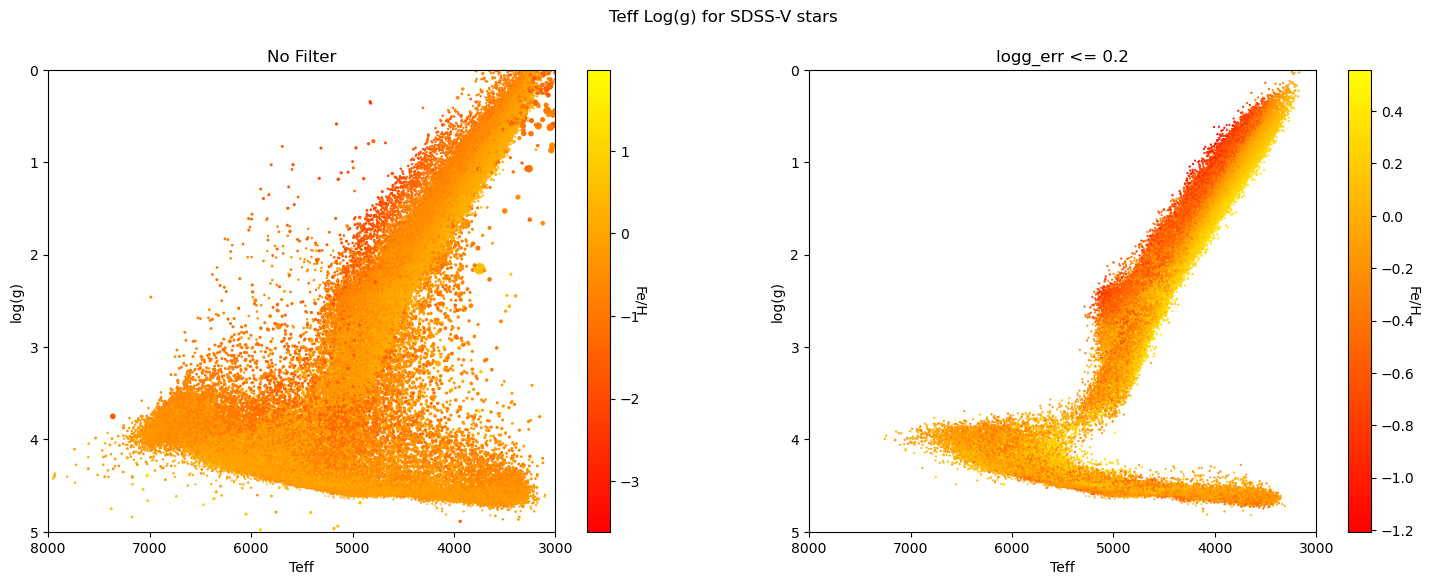

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Teff Log(g) for SDSS-V stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
dff = df[df["teff"] > 0]
dff = dff[dff["logg"] < 10]
dff = dff[dff["Fe"] < 2]

map1 = ax1.scatter(dff["teff"], dff["logg"], s = dff["logg_err"]*2, c = dff["Fe"], cmap = "autumn")
ax1.set_title("No Filter")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 0])

map2 = ax2.scatter(filt["teff"], filt["logg"], s = filt["logg_err"]*2, c = filt["Fe"], cmap = "autumn")
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 0])
#ax2.hlines(y = 3.7, xmin = 3000, xmax = 8000, linewidth = 2, color = 'r')

fig.colorbar(map1).set_label("Fe/H", rotation=270)
fig.colorbar(map2).set_label("Fe/H", rotation=270)
fig.show()

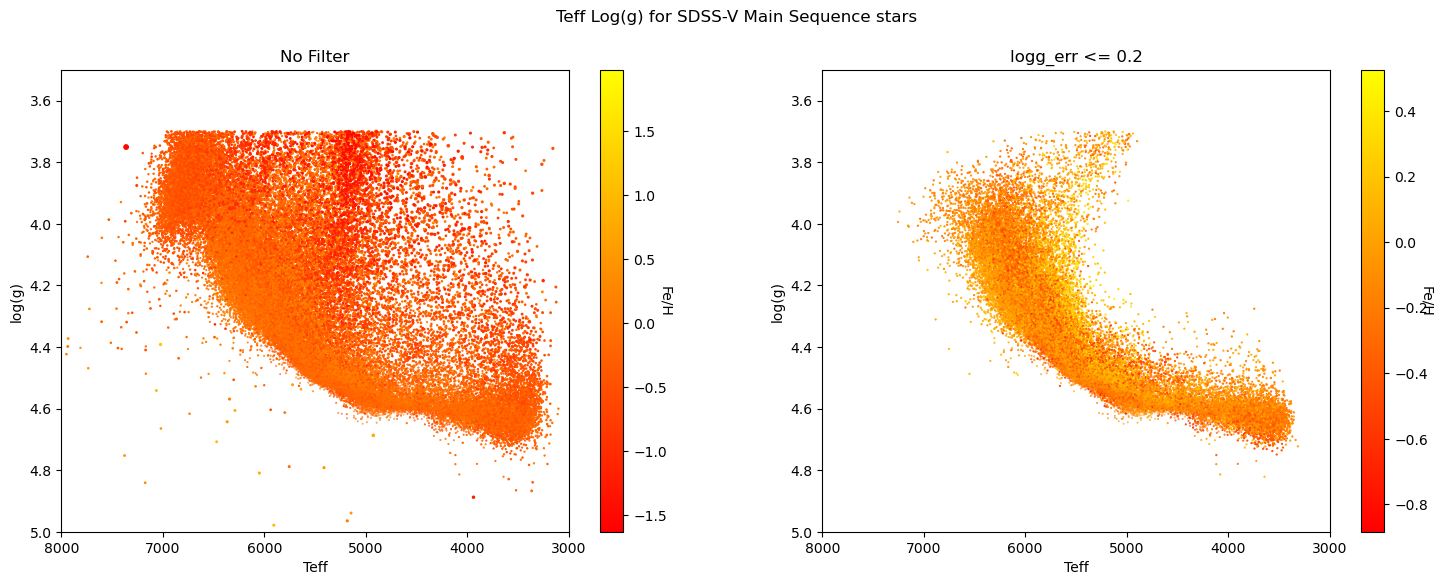

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Teff Log(g) for SDSS-V Main Sequence stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
msf = ms[ms["teff"] > 0]
msf = msf[msf["logg"] < 10]
msf = msf[msf["Fe"] < 2]

map1 = ax1.scatter(msf["teff"], msf["logg"], s = msf["logg_err"]*2, c = msf["Fe"], cmap = "autumn")
ax1.set_title("No Filter")
ax1.set_xlabel("Teff")
ax1.set_ylabel("log(g)")
ax1.set_xlim([8000, 3000])
ax1.set_ylim([5, 3.5])

map2 = ax2.scatter(ms_filt["teff"], ms_filt["logg"], s = ms_filt["logg_err"]*2, c = ms_filt["Fe"], cmap = "autumn")
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Teff")
ax2.set_ylabel("log(g)")
ax2.set_xlim([8000, 3000])
ax2.set_ylim([5, 3.5])
#ax2.hlines(y = 3.7, xmin = 3000, xmax = 8000, linewidth = 2, color = 'r')

fig.colorbar(map1).set_label("Fe/H", rotation=270)
fig.colorbar(map2).set_label("Fe/H", rotation=270)
fig.show()

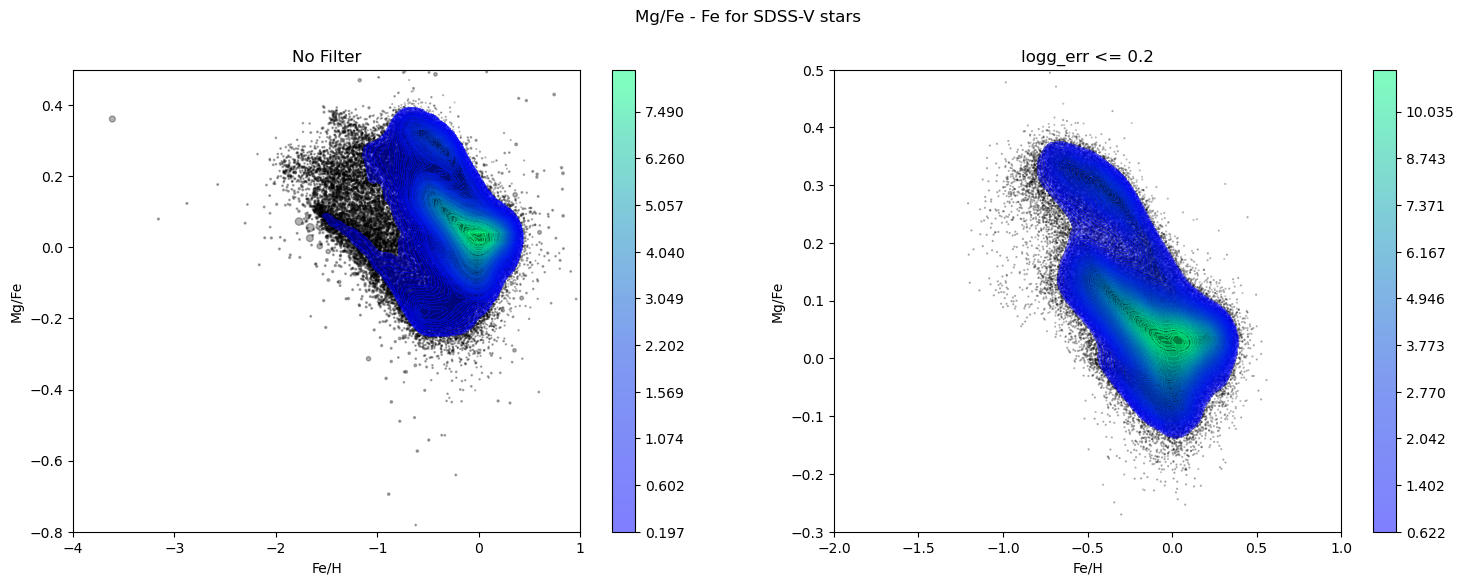

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Mg/Fe - Fe for SDSS-V stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
dff = df[df["teff"] > 0]
dff = dff[dff["logg"] < 10]
dff = dff[dff["Fe"] < 2]

x1, y1 = dff["Fe"], dff["Mg/Fe"]
x2, y2 = filt["Fe"], filt["Mg/Fe"]
 
ax1.scatter(x1, y1, s = dff["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x1, y=y1, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax1)
ax1.set_title("No Filter")
ax1.set_xlabel("Fe/H")
ax1.set_ylabel("Mg/Fe")
ax1.set_xlim([-4, 1])
ax1.set_ylim([-0.8, 0.5])


ax2.scatter(x2, y2, s = filt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x2, y=y2, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax2)
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Fe/H")
ax2.set_ylabel("Mg/Fe")
ax2.set_xlim([-2, 1])
ax2.set_ylim([-0.3, 0.5])

fig.show()

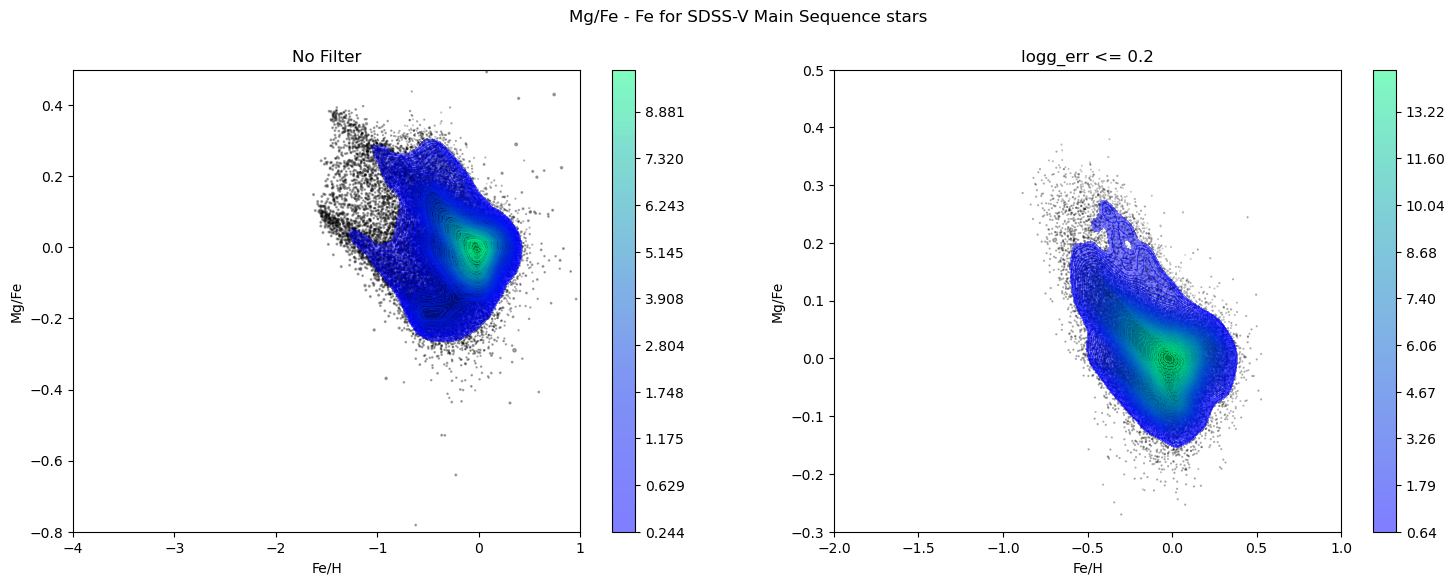

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Mg/Fe - Fe for SDSS-V Main Sequence stars")
fig.set_size_inches(18, 6)

#filters to make the first plot look better
msf = ms[ms["teff"] > 0]
msf = msf[msf["logg"] < 10]
msf = msf[msf["Fe"] < 2]

x1, y1 = msf["Fe"], msf["Mg/Fe"]
x2, y2 = ms_filt["Fe"], ms_filt["Mg/Fe"]
 
ax1.scatter(x1, y1, s = msf["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x1, y=y1, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax1)
ax1.set_title("No Filter")
ax1.set_xlabel("Fe/H")
ax1.set_ylabel("Mg/Fe")
ax1.set_xlim([-4, 1])
ax1.set_ylim([-0.8, 0.5])


ax2.scatter(x2, y2, s = ms_filt["logg_err"]*2, c = "black", alpha = 0.3)
sns.kdeplot(x=x2, y=y2, cmap="winter", levels = 100, fill=True, alpha = 0.5, cbar = True, ax = ax2)
ax2.set_title("logg_err <= 0.2")
ax2.set_xlabel("Fe/H")
ax2.set_ylabel("Mg/Fe")
ax2.set_xlim([-2, 1])
ax2.set_ylim([-0.3, 0.5])

fig.show()